In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Simple linear Regression Example

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
x = np.arange(1,10)
y= np.array([28, 25, 26, 31, 32, 29, 30, 35, 36])

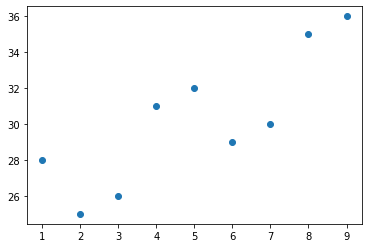

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [10]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [11]:
yhat = reg.predict(x)

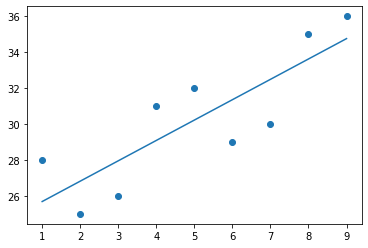

In [12]:
plt.scatter(x,y)
plt.plot(x,yhat)
plt.show()

# Boston Dataset and Linear Regression 

In [16]:
from sklearn.datasets import load_boston

In [17]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['Price'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [18]:
x = boston.data
y = boston.target

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test ,y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [24]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

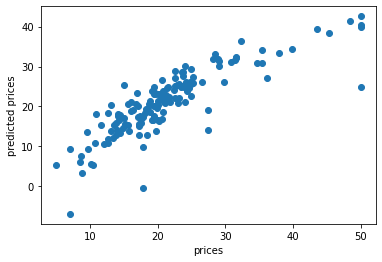

In [25]:
plt.scatter(y_test, y_pred)
plt.plot()
plt.xlabel('prices')
plt.ylabel('predicted prices')
plt.show()

# Mean square error (MSE) : to evaluating the model

In [27]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test, y_pred)
mse

21.51744423117739

In [29]:
new_x = boston.data[:,[1,2]]
new_y = boston.target

new_x_train, new_x_test ,new_y_train, new_y_test = train_test_split(new_x, new_y, test_size = 0.3, random_state=42)

new_reg = LinearRegression()
new_reg.fit(new_x_train, new_y_train)
new_y_predict = new_reg.predict(new_x_test)

new_mse = metrics.mean_squared_error(new_y_test, new_y_predict)
new_mse

52.49477133220751

# CrossValidation (K-Fold Cross Validation)

To optimize the results, we can use Cross Validation technique.


In [31]:
from sklearn.model_selection import cross_val_score

reg = LinearRegression()
first_cv_scores = cross_val_score(reg, x, y, cv=5)
second_cv_scores = cross_val_score(reg, x, y, cv=10)

print('mean in first_cv_scores is {0:.2f} and in second_cv_scores is {1:.2f}'.format(np.mean(first_cv_scores), np.mean(second_cv_scores)) )

mean in first_cv_scores is 0.35 and in second_cv_scores is 0.20


# Regularization Regression

[-0.          0.         -0.          0.         -0.          2.95469455
 -0.          0.         -0.         -0.         -0.24795837  0.
 -0.42817439]


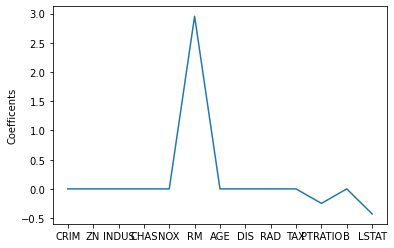

In [35]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(x, y)
lasso_coef = lasso.coef_

print(lasso_coef)

plt.plot(range(13), lasso_coef)
plt.xticks(range(13), boston.feature_names)
plt.ylabel('Coefficents')
plt.show()

In [38]:
from sklearn.linear_model import Ridge

x = boston.data
y = boston.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

ridge = Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)
ridge_pred = ridge.predict(x_test)